# Частина третя: Аналіз датасет c Kaggle.com

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Зчитуємо данні з csv файла

In [55]:
df = pd.read_csv('/content/sample_data/bestsellers with categories.csv')

# Виводимо перші п'ять рядків

In [56]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Виводимо розміри датасету

In [57]:
print(f"Кількість рядків та стовпців: {df.shape}")

Кількість рядків та стовпців: (550, 7)


# Питання:
Про скільки книг зберігає дані датасет?

In [58]:
print(f"\033[1mВідповідь:\033[0m\nДатасет зберігає дані про {len(df)-1} книг")

Відповідь:
Датасет зберігає дані про 549 книг


# Підправимо назви змінних

In [59]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних

# Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [60]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

# Питання:
Чи є в якихось змінних пропуски? (Так / ні)

***Відповідь:***
*Ні*

# Перевіряємо, які є унікальні значення в колонці genre

In [61]:
unique_genres = df["genre"].unique()
unique_genres

array(['Non Fiction', 'Fiction'], dtype=object)

# Питання
Які є унікальні жанри?

In [62]:
print(f"\033[1mВідповідь:\033[0m\nДатасет зберігає дані про наступні унікальні жанри:\n- {unique_genres[0]}\n- {unique_genres[1]}")

Відповідь:
Датасет зберігає дані про наступні унікальні жанри:
- Non Fiction
- Fiction


# Тепер подивимось на розподіл цін: побудуємо діаграму

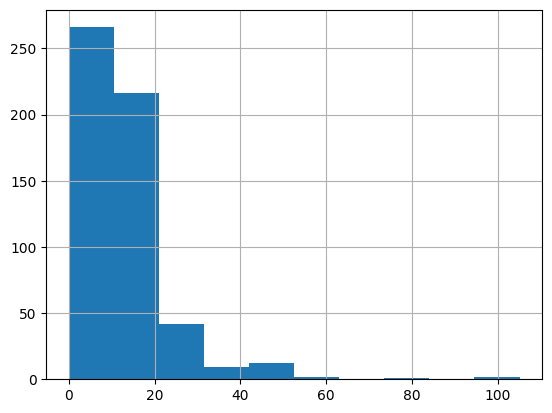

In [63]:
df['price'].hist()
plt.show()

# Визначаємо, яка ціна у нас максимальна, мінімальна, середня, медіанна

In [64]:
max_price = df['price'].max()
min_price = df['price'].min()
avg_price = df['price'].mean()
median_price = df['price'].median()

# Питання:
 Максимальна ціна?

In [65]:
print(f"\033[1mВідповідь:\033[0m\nМакмимальна ціна - {max_price}")

Відповідь:
Макмимальна ціна - 105


# Питання:
 Мінімальна ціна?

In [66]:
print(f"\033[1mВідповідь:\033[0m\nМінімальна ціна - {min_price}")

Відповідь:
Мінімальна ціна - 0


# Питання:
 Середня ціна?

In [67]:
print(f"\033[1mВідповідь:\033[0m\nСередня ціна - {avg_price}")

Відповідь:
Середня ціна - 13.1


# Питання:
 Медіанна ціна?

In [68]:
print(f"\033[1mВідповідь:\033[0m\nМедіанна ціна - {median_price}")

Відповідь:
Медіанна ціна - 11.0


# Пошук та сортування даних

# Питання:
 Який рейтинг у датасеті найвищий?

In [69]:
max_rating = df['user_rating'].max()
print(f"\033[1mВідповідь:\033[0m\nНайвищий рейтинг у датасеті - {max_rating}")

Відповідь:
Найвищий рейтинг у датасеті - 4.9


# Питання:
 Скільки книг мають такий рейтинг?

In [70]:
num_books_with_highest_rating = (df['user_rating'] == max_rating).sum()
print(f"\033[1mВідповідь:\033[0m\nКількість книжок з найвищім рейтингом - {num_books_with_highest_rating}")

Відповідь:
Кількість книжок з найвищім рейтингом - 52


# Питання:
 Яка книга має найбільше відгуків?

In [71]:
book_with_most_reviews = df.sort_values('reviews', ascending=False).iloc[0]['name']
print(f"\033[1mВідповідь:\033[0m\nКнига з найбільшою кількістю відгуків - '{book_with_most_reviews}'")

Відповідь:
Книга з найбільшою кількістю відгуків - 'Where the Crawdads Sing'


# Питання:
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?

In [72]:
top_50_2015 = df.loc[(df['year'] == 2015)]

In [73]:
most_expensive_book = top_50_2015.loc[top_50_2015['price'].idxmax()]

In [74]:
print(f"\033[1mВідповідь:\033[0m\nНайдорожча книга яка потрапила до Топ-50 у 2015 році:\nКнига: '{most_expensive_book['name']}'\nАвтор: '{most_expensive_book['author']}'\nЦіна: {most_expensive_book['price']}$")

Відповідь:
Найдорожча книга яка потрапила до Топ-50 у 2015 році:
Книга: 'Publication Manual of the American Psychological Association, 6th Edition'
Автор: 'American Psychological Association'
Ціна: 46$


# Питання:
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?

In [75]:
top_50_2010 = df.loc[(df['year'] == 2010) & (df['genre'] == 'Fiction')].nlargest(50, 'user_rating')

In [76]:
print(f"\033[1mВідповідь:\033[0m\nКількість книг жанру Fiction у Топ-50 за 2010 рік - {len(top_50_2010)}")

Відповідь:
Кількість книг жанру Fiction у Топ-50 за 2010 рік - 20


# Питання: 
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?

In [77]:
top_in_2010_2011 = df.loc[(df['year'].isin([2010, 2011])) & (df['user_rating'] == max_rating)]

In [78]:
print(f"\033[1mВідповідь:\033[0m\nКількість книг з рейтингом 4.9 у 2010 та 2011 роках - {len(top_in_2010_2011)}")

Відповідь:
Кількість книг з рейтингом 4.9 у 2010 та 2011 роках - 1


# Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів

In [79]:
top_50_2015 = df.loc[(df['year'] == 2010)].nlargest(50, 'user_rating')

In [80]:
cheap_books = top_50_2015.loc[(top_50_2015['price'] < 8)].sort_values('price')
cheap_books

,name,author,user_rating,reviews,price,year,genre
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010,Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
370,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2010,Non Fiction
419,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction


# Питання:
Яка книга остання у відсортованому списку?

In [81]:
last_book = cheap_books.tail(1)['name']

In [82]:
print(f"\033[1mВідповідь:\033[0m\nОстання у відсортованому списку - {last_book.values[0]}")

Відповідь:
Остання у відсортованому списку - The Last Olympian (Percy Jackson and the Olympians, Book 5)


# Агрегування даних та з'єднання таблиць

# Подивимось на максимальну та мінімальну ціни для кожного з жанрів

In [83]:
df_filtered = df[['genre', 'price']]

In [84]:
genre_prices = df_filtered.groupby('genre').agg({'price': ['min', 'max']})
genre_prices

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

# Питання:
 Максимальна ціна для жанру Fiction?

In [85]:
print(f"\033[1mВідповідь:\033[0m\nМаксимальна ціна для жанру Fiction - {genre_prices.loc['Fiction', ('price', 'max')]}")

Відповідь:
Максимальна ціна для жанру Fiction - 82


# Питання:
 Мінімальна ціна для жанру Fiction?

In [86]:
print(f"\033[1mВідповідь:\033[0m\nМінімальна ціна для жанру Fiction - {genre_prices.loc['Fiction', ('price', 'min')]}")

Відповідь:
Мінімальна ціна для жанру Fiction - 0


# Питання:
 Максимальна ціна для жанру Non Fiction?

In [87]:
print(f"\033[1mВідповідь:\033[0m\nМаксимальна ціна для жанру Non Fiction - {genre_prices.loc['Non Fiction', ('price', 'max')]}")

Відповідь:
Максимальна ціна для жанру Non Fiction - 105


# Питання:
 Мінімальна ціна для жанру Non Fiction?

In [88]:
print(f"\033[1mВідповідь:\033[0m\nМінімальна ціна для жанру Non Fiction - {genre_prices.loc['Non Fiction', ('price', 'min')]}")

Відповідь:
Мінімальна ціна для жанру Non Fiction - 0


# Створюємо новий датафрейм, який вміщатиме кількість книг для кожного з авторів

In [89]:
books_per_author = df.groupby('author')['name'].agg('count').reset_index()
books_per_author.columns = ['author', 'book_count']
books_per_author.head()

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1


# Питання:
Якої розмірності вийшла таблиця?

In [90]:
print(f"\033[1mВідповідь:\033[0m\nТаблиця має {books_per_author.shape[0]} рядка, та {books_per_author.shape[1]} стовбчика")

Відповідь:
Таблиця має 248 рядка, та 2 стовбчика


# Питання:
 Який автор має найбільше книг?

In [91]:
author_books_count = books_per_author.sort_values('book_count', ascending=False)

In [92]:
top_author = author_books_count.head(1)['author'].iloc[0]

In [93]:
print(f"\033[1mВідповідь:\033[0m\nНайбільше книг має: {top_author}")

Відповідь:
Найбільше книг має: Jeff Kinney


# Питання:
 Скільки книг цього автора?

In [94]:
top_author_books_count = author_books_count.head(1)['book_count'].iloc[0]

In [95]:
print(f"\033[1mВідповідь:\033[0m\n{top_author} має: {top_author_books_count} книг")

Відповідь:
Jeff Kinney має: 12 книг


# Створюємо датафрейм, який буде вміщати середній рейтинг для кожного автора

In [96]:
avg_rating_per_author = df.groupby('author')['user_rating'].agg('mean').reset_index()
avg_rating_per_author.columns = ['author', 'average_rating']
avg_rating_per_author.head()

,author,average_rating
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7


# Питання:
 У якого автора середній рейтинг мінімальний?

In [97]:
sorted_avg_rating_per_author = avg_rating_per_author.sort_values('average_rating')

In [98]:
author_with_min_avg_rating = sorted_avg_rating_per_author.head(1)['author'].iloc[0]

In [99]:
print(f"\033[1mВідповідь:\033[0m\nАвтор \033[1m{author_with_min_avg_rating}\033[0m має мінімальний рейтинг")

Відповідь:
Автор Donna Tartt має мінімальний рейтинг


# Питання:
 Який у цього автора середній рейтинг?

In [100]:
min_avg_rating = sorted_avg_rating_per_author.head(1)['average_rating'].iloc[0]

In [101]:
print(f"\033[1mВідповідь:\033[0m\nАвтор \033[1m{author_with_min_avg_rating}\033[0m має рейтинг: \033[1m{min_avg_rating}\033[0m")

Відповідь:
Автор Donna Tartt має рейтинг: 3.9


# З'єднуємо останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг

In [102]:
combined_df = pd.concat([books_per_author.set_index('author'), avg_rating_per_author.set_index('author')], axis=1, join='inner')
combined_df.head()

,book_count,average_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


# Відсортуємо датафрейм за зростаючою кількістю книг та зростаючим рейтингом

In [103]:
combined_df.sort_values(by=['book_count', 'average_rating'], ascending=[True, True])
combined_df.head()

,book_count,average_rating
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


# Питання:
 Який автор перший у списку?

In [104]:
first_in_combined_df = combined_df.iloc[0].name

In [105]:
print(f"\033[1mВідповідь:\033[0m\nПерший у списку автор: \033[1m{first_in_combined_df}\033[0m")

Відповідь:
Перший у списку автор: Abraham Verghese


**Графіки**

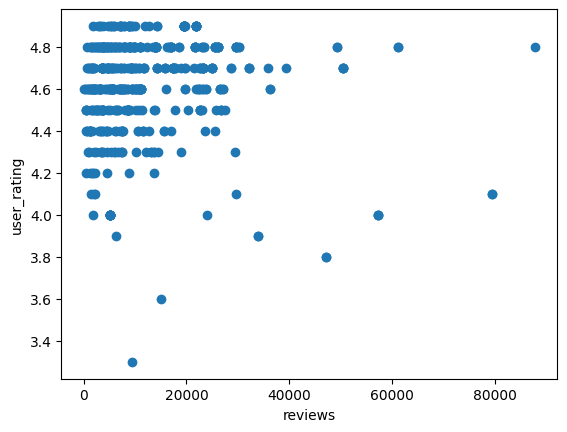

In [109]:
plt.scatter(df['reviews'], df['user_rating'])
plt.xlabel('reviews')
plt.ylabel('user_rating')
plt.show()

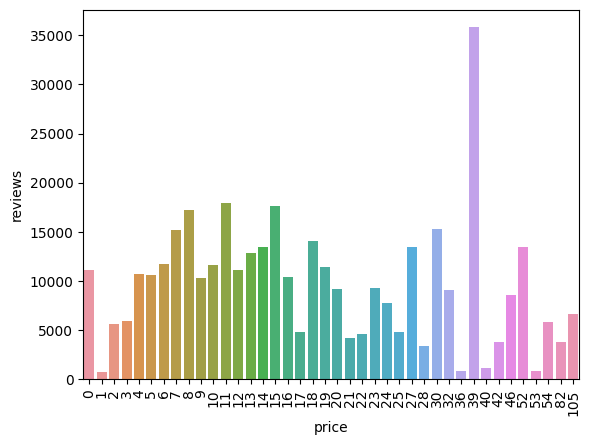

In [127]:
avg_reviews_by_price = df.groupby("price")[["reviews"]].mean()

ax = sns.barplot(x=avg_reviews_by_price.index, y="reviews", data=avg_reviews_by_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

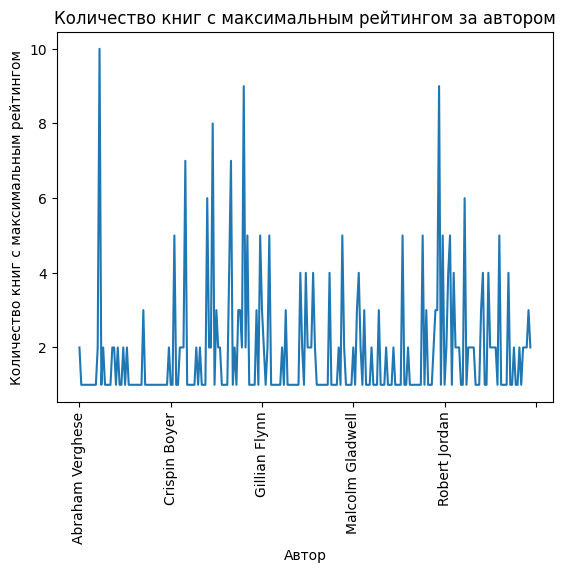

In [142]:
max_ratings = df.groupby('author')['user_rating'].max()
books_with_max_rating = df[df['user_rating'] == df.groupby('author')['user_rating'].transform('max')]
max_rating_counts = books_with_max_rating.groupby('author')['name'].count()

max_rating_counts.plot(kind='line')
plt.xticks(rotation=90)
plt.xlabel("Автор")
plt.ylabel("Количество книг с максимальным рейтингом")
plt.title("Количество книг с максимальным рейтингом за автором")
plt.show()